##Práctica 1. Exploración y normalización de textos.

Última modificación: 15/03/2024

Procesamiento del texto en español

In [1]:
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
import matplotlib.pyplot as plt
import nltk



nlp = spacy.load("es_core_news_sm")


texto__es="""Por lo general, no pensamos en las complejidades de nuestros propios lenguajes. Es un
comportamiento intuitivo que se utiliza para transmitir información y significados con señales
semánticas, como palabras, signos o imágenes. Se dice que es más fácil aprender un idioma
nuevo cuando somos adolescentes porque se trata de un comportamiento repetible y entrenado,
casi como caminar. Asimismo, el idioma no sigue un conjunto de reglas estricto, ya que las
excepciones son innumerables, por ejemplo: los sustantivos que terminan con ‘a’ son femeninos,
pero no es el caso del sustantivo ‘el problema‘. Sin embargo, a los humanos nos resulta natural
es extremadamente difícil para las computadoras, ya que tienen que lidiar con una gran cantidad
de datos no estructurados, la ausencia de reglas formales y la falta de un contexto o una intención
real. Es por eso que el aprendizaje automático y la inteligencia artificial (IA) ganan fuerza y llaman
la atención, puesto que los humanos dependen cada vez más de los sistemas informáticos para
comunicarse y realizar tareas. A medida que la IA se vuelve más sofisticada, también lo hace el
procesamiento del lenguaje natural (PLN).
El Procesamiento del Lenguaje Natural es el campo de conocimiento de la Inteligencia
Artificial que se ocupa de la investigar la manera de comunicar las máquinas con las personas
mediante el uso de lenguas naturales, como el español, el inglés o el chino. Virtualmente,
cualquier lengua humana puede ser tratada por los ordenadores. Lógicamente, limitaciones de
interés económico o práctico hace que solo las lenguas más habladas o utilizadas en el mundo
digital tengan aplicaciones en uso.
Pensemos en cuántas lenguas hablan Siri (20) o Google Assistant (8). El inglés, español, alemán,
francés, portugués, chino, árabe y japonés (no necesariamente en este orden) son las que
cuentan con más aplicaciones que las entienden. Google Translate es la que más lenguas trata,
superando el centenar... pero hay entre 5000 y 7000 lenguas en el mundo."""

##Procesamiento del texto
documento_es = nlp(texto__es)


Imprimir cada token y contar el número de tokens que hay en el texto.

In [2]:
##Imprime cada token del texto
for token in documento_es:
    print(token.text)
    
##contar el numero de tokens
print("\n\n Número total de tokens:",len(documento_es))


Por
lo
general
,
no
pensamos
en
las
complejidades
de
nuestros
propios
lenguajes
.
Es
un


comportamiento
intuitivo
que
se
utiliza
para
transmitir
información
y
significados
con
señales


semánticas
,
como
palabras
,
signos
o
imágenes
.
Se
dice
que
es
más
fácil
aprender
un
idioma


nuevo
cuando
somos
adolescentes
porque
se
trata
de
un
comportamiento
repetible
y
entrenado
,


casi
como
caminar
.
Asimismo
,
el
idioma
no
sigue
un
conjunto
de
reglas
estricto
,
ya
que
las


excepciones
son
innumerables
,
por
ejemplo
:
los
sustantivos
que
terminan
con
‘
a
’
son
femeninos
,


pero
no
es
el
caso
del
sustantivo
‘
el
problema
‘
.
Sin
embargo
,
a
los
humanos
nos
resulta
natural


es
extremadamente
difícil
para
las
computadoras
,
ya
que
tienen
que
lidiar
con
una
gran
cantidad


de
datos
no
estructurados
,
la
ausencia
de
reglas
formales
y
la
falta
de
un
contexto
o
una
intención


real
.
Es
por
eso
que
el
aprendizaje
automático
y
la
inteligencia
artificial
(
IA
)
ganan
fuerza
y
llaman


la
atención
,

In [3]:
##Creamos una lista para ir guardando los tokens unicos
lista = []
##Imprime los tokes unicos
for token in documento_es:
    if token.text not in lista:
        lista.append(token.text)

##Imprime la lista de tokens unicos        
print("Lista de tokens unicos:")
print(lista)

##Imprime el numero de tokens unicos
print("\n\nNumero de tokens unicos:", len(lista))



Lista de tokens unicos:
['Por', 'lo', 'general', ',', 'no', 'pensamos', 'en', 'las', 'complejidades', 'de', 'nuestros', 'propios', 'lenguajes', '.', 'Es', 'un', '\n', 'comportamiento', 'intuitivo', 'que', 'se', 'utiliza', 'para', 'transmitir', 'información', 'y', 'significados', 'con', 'señales', 'semánticas', 'como', 'palabras', 'signos', 'o', 'imágenes', 'Se', 'dice', 'es', 'más', 'fácil', 'aprender', 'idioma', 'nuevo', 'cuando', 'somos', 'adolescentes', 'porque', 'trata', 'repetible', 'entrenado', 'casi', 'caminar', 'Asimismo', 'el', 'sigue', 'conjunto', 'reglas', 'estricto', 'ya', 'excepciones', 'son', 'innumerables', 'por', 'ejemplo', ':', 'los', 'sustantivos', 'terminan', '‘', 'a', '’', 'femeninos', 'pero', 'caso', 'del', 'sustantivo', 'problema', 'Sin', 'embargo', 'humanos', 'nos', 'resulta', 'natural', 'extremadamente', 'difícil', 'computadoras', 'tienen', 'lidiar', 'una', 'gran', 'cantidad', 'datos', 'estructurados', 'la', 'ausencia', 'formales', 'falta', 'contexto', 'intenció

Histograma de los 15 tokens más comunes.

Text(0, 0.5, 'Frecuencia')

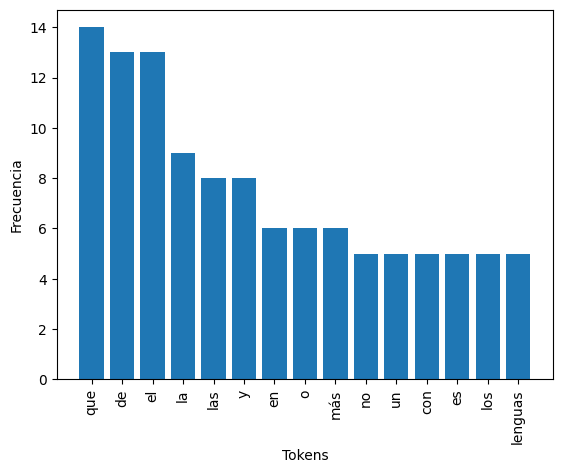

In [4]:
##contamos el numero de veces que aparece cada token
frecuencia = {}
for token in documento_es:
    if token.text in frecuencia:
        frecuencia[token.text] += 1
    else:
        frecuencia[token.text] = 1

##Quitamos los signos de puntuacion
frecuencia.pop("\n")
frecuencia.pop(".")
frecuencia.pop(",")
frecuencia.pop(":")
frecuencia.pop("(")
frecuencia.pop(")")

##Hacemos el histograma de frecuencias
fig, ax = plt.subplots()
##seleccionamos los 15 tokens mas frecuentes
frecuencia = dict(sorted(frecuencia.items(), key=lambda item: item[1], reverse=True))
frecuencia = dict(list(frecuencia.items())[0:15])
ax.bar(frecuencia.keys(), frecuencia.values())
plt.xticks(rotation=90)
ax.set_xlabel('Tokens')
ax.set_ylabel('Frecuencia')



Texto sin stopwords:
['general', 'pensamos', 'complejidades', 'lenguajes', 'comportamiento', 'intuitivo', 'utiliza', 'transmitir', 'información', 'significados', 'señales', 'semánticas', 'palabras', 'signos', 'imágenes', 'fácil', 'aprender', 'idioma', 'adolescentes', 'comportamiento', 'repetible', 'entrenado', 'caminar', 'asimismo', 'idioma', 'conjunto', 'reglas', 'estricto', 'excepciones', 'innumerables', 'ejemplo', 'sustantivos', 'terminan', 'femeninos', 'caso', 'sustantivo', 'problema', 'humanos', 'resulta', 'natural', 'extremadamente', 'difícil', 'computadoras', 'lidiar', 'cantidad', 'datos', 'estructurados', 'ausencia', 'reglas', 'formales', 'falta', 'contexto', 'intención', 'real', 'aprendizaje', 'automático', 'inteligencia', 'artificial', 'ia', 'ganan', 'fuerza', 'llaman', 'atención', 'puesto', 'humanos', 'dependen', 'sistemas', 'informáticos', 'comunicarse', 'tareas', 'medida', 'ia', 'vuelve', 'sofisticada', 'procesamiento', 'lenguaje', 'natural', 'pln', 'procesamiento', 'len

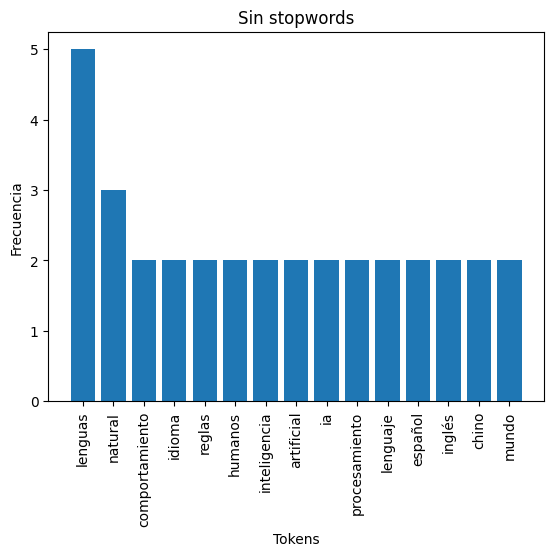



Texto lematizado:
['general', 'pensar', 'complejidad', 'lenguaje', 'comportamiento', 'intuitivo', 'utilizar', 'transmitir', 'información', 'significar', 'señal', 'semántico', 'palabra', 'signo', 'imagen', 'fácil', 'aprender', 'idioma', 'adolescente', 'tratar', 'comportamiento', 'repetible', 'entrenado', 'caminar', 'asimismo', 'idioma', 'seguir', 'conjunto', 'regla', 'estricto', 'excepción', 'innumerable', 'ejemplo', 'sustantivo', 'terminar', 'femenino', 'caso', 'sustantivo', 'problema', 'humano', 'resultar', 'natural', 'extremadamente', 'difícil', 'computadora', 'lidiar', 'cantidad', 'dato', 'estructurado', 'ausencia', 'regla', 'formal', 'falta', 'contexto', 'intención', 'real', 'aprendizaje', 'automático', 'inteligencia', 'artificial', 'ia', 'ganar', 'fuerza', 'llamar', 'atención', 'puesto', 'humano', 'depender', 'sistema', 'informático', 'comunicar él', 'tarea', 'medida', 'ia', 'volver', 'sofisticado', 'procesamiento', 'lenguaje', 'natural', 'pln', 'procesamiento', 'lenguaje', 'nat

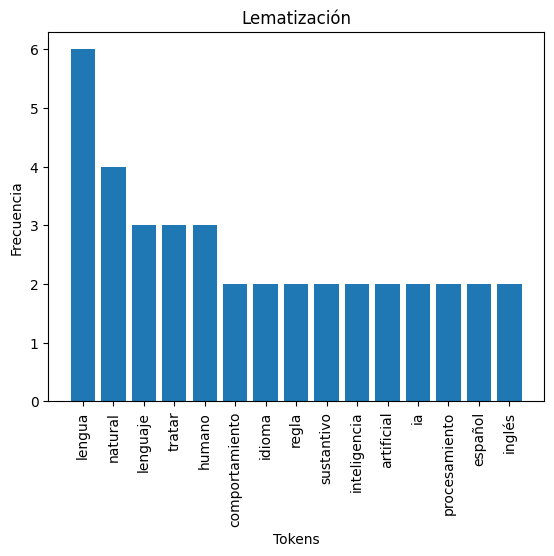



Texto stem:
['general', 'pens', 'complej', 'nuestr', 'propi', 'lenguaj', 'comport', 'intuit', 'utiliz', 'par', 'transmit', 'inform', 'signific', 'señal', 'semant', 'com', 'palabr', 'sign', 'imagen', 'dic', 'facil', 'aprend', 'idiom', 'nuev', 'cuand', 'som', 'adolescent', 'porqu', 'trat', 'comport', 'repet', 'entren', 'com', 'camin', 'asim', 'idiom', 'sig', 'conjunt', 'regl', 'estrict', 'excepcion', 'innumer', 'ejempl', 'sustant', 'termin', 'femenin', 'per', 'cas', 'sustant', 'problem', 'embarg', 'human', 'result', 'natural', 'extrem', 'dificil', 'par', 'comput', 'tien', 'lidi', 'cantid', 'dat', 'estructur', 'ausenci', 'regl', 'formal', 'falt', 'context', 'intencion', 'real', 'aprendizaj', 'automat', 'inteligent', 'artificial', 'ia', 'gan', 'fuerz', 'llam', 'atencion', 'puest', 'human', 'depend', 'cad', 'sistem', 'informat', 'par', 'comunic', 'realiz', 'tar', 'med', 'ia', 'vuelv', 'sofistic', 'hac', 'proces', 'lenguaj', 'natural', 'pln', 'proces', 'lenguaj', 'natural', 'camp', 'conoc'

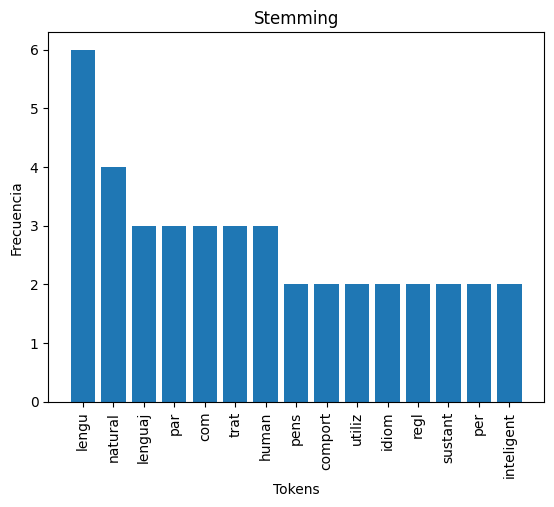



Texto normalizado:
general pens complej lenguaj comport intuit utiliz transmit inform signific señal semant palabr sign imag facil aprend idiom adolescent trat comport repet entren camin asim idiom segu conjunt regl estrict excepcion innumer ejempl sustant termin femenin cas sustant problem human result natural extrem dificil comput lidi cantid dat estructur ausenci regl formal falt context intencion real aprendizaj automat inteligent artificial ia gan fuerz llam atencion puest human depend sistem informat tare med ia volv sofistic proces lenguaj natural pln proces lenguaj natural camp conoc inteligent artificial ocup investig comunic maquin person lengu natural español ingles chin virtual cualqu lengu human trat orden logic limit interes econom practic lengu habl utiliz mund digital aplic pens lengu habl siri googl assistant ingles español aleman frances portugues chin arab japones necesari orden cont aplic entend googl translat lengu trat super centen lengu mund


In [5]:
# Hacemos la remoción de stopwords y signos de puntuación
texto = [token.text.lower() for token in documento_es if not token.is_punct and not token.is_space and token.text.lower() not in STOP_WORDS]

# Imprimimos el texto sin stopwords
print("\n\nTexto sin stopwords:")
print(texto)

# Contamos la frecuencia de las palabras sin stopwords
frecuencia_1 = {}
for token in texto:
    if token in frecuencia_1:
        frecuencia_1[token] += 1
    else:
        frecuencia_1[token] = 1

# Imprimimos el número de tokens sin stopwords
print("\n\nNúmero de tokens sin stopwords:", len(texto))

# Hacemos el histograma de frecuencias
fig, ax = plt.subplots()
frecuencia_1 = dict(sorted(frecuencia_1.items(), key=lambda item: item[1], reverse=True)[:15])
ax.bar(frecuencia_1.keys(), frecuencia_1.values())
plt.xticks(rotation=90)
ax.set_xlabel('Tokens')
ax.set_ylabel('Frecuencia')
ax.set_title('Sin stopwords')
plt.show()

# Procesamos el texto lematizado
texto_lematizado = [token.lemma_.lower() for token in documento_es if not token.is_punct and not token.is_space and token.lemma_.lower() not in STOP_WORDS]

# Imprimimos el texto lematizado
print("\n\nTexto lematizado:")
print(texto_lematizado)

# Contamos la frecuencia de las palabras lematizadas
frecuencia_2 = {}
for token in texto_lematizado:
    if token in frecuencia_2:
        frecuencia_2[token] += 1
    else:
        frecuencia_2[token] = 1

# Imprimimos el número de tokens lematizados
print("\n\nNúmero de tokens lematizados:", len(texto_lematizado))

# Hacemos el histograma de frecuencias para las palabras lematizadas
fig, ax = plt.subplots()
frecuencia_2 = dict(sorted(frecuencia_2.items(), key=lambda item: item[1], reverse=True)[:15])
ax.bar(frecuencia_2.keys(), frecuencia_2.values())
plt.xticks(rotation=90)
ax.set_xlabel('Tokens')
ax.set_ylabel('Frecuencia')
ax.set_title('Lematización')
plt.show()

# Aplicamos el stemmer
stemmer = nltk.stem.SnowballStemmer('spanish')
texto_stem = [stemmer.stem(token.text.lower()) for token in documento_es if not token.is_punct and not token.is_space and stemmer.stem(token.text.lower()) not in STOP_WORDS]

# Imprimimos el texto stem
print("\n\nTexto stem:")
print(texto_stem)

# Contamos la frecuencia de las palabras lematizadas
frecuencia_3 = {}
for token in texto_stem:
    if token in frecuencia_3:
        frecuencia_3[token] += 1
    else:
        frecuencia_3[token] = 1

# Imprimimos el número de tokens lematizados
print("\n\nNúmero de tokens stem:", len(texto_stem))

# Hacemos el histograma de frecuencias para las palabras lematizadas
fig, ax = plt.subplots()
frecuencia_3 = dict(sorted(frecuencia_3.items(), key=lambda item: item[1], reverse=True)[:15])
ax.bar(frecuencia_3.keys(), frecuencia_3.values())
plt.xticks(rotation=90)
ax.set_xlabel('Tokens')
ax.set_ylabel('Frecuencia')
ax.set_title('Stemming')
plt.show()

#Aplicamos todas las normalizaciones
texto__es = [token.lemma_.lower() for token in documento_es if not token.is_punct and not token.is_space and token.lemma_.lower() not in STOP_WORDS]
texto__es = [token for token in texto__es if token.isalpha()]
texto__es = [stemmer.stem(token) for token in texto__es]
texto__es = " ".join(texto__es)

# Imprimimos el texto normalizado
print("\n\nTexto normalizado:")
print(texto__es)

Procesamiento del texto en inglés

In [6]:
nlp = spacy.load("en_core_web_sm")
texto_Ing="""My own journey toward language was sparked in 1996 when I discovered Keith Basso’s
astonishing book Wisdom Sits in Places. Writing about the unique place-making language of the
Western Apache, Basso described language in a way that I’d never considered before, as roots
and fragments strung together to sing of the land. This idea intrigued me so much that I began
carrying Donald Borror’s classic little book, the Dictionary of Word Roots and Combining Forms,
with me on all my hikes (a practice which I’ve continued on a daily basis for nearly twenty years
and on thousands of miles of trails) in order to learn the meaning and origin of word elements at
the moment they occurred to me while walking in wild landscapes.

For many years this seemed little more than a quirky hobby, with no real intent or direction, but
then a friend introduced me to Calvert Watkins’s magisterial survey of Indo-European
poetics, How to Kill a Dragon. In a flash I realized that there might be untapped ways for the
English language to speak of the magic of the land and the depths of the human spirit, so I began 
a four-year quest to read every book I could find on the history, formation, and word-making
processes of the English language.

What you hold here is the result of my investigation: 76 sections that explore some of the many
pieces and processes that have gone into shaping the English language as we use it today. As I
researched and wrote each section of this book I carried these ideas with me on long hikes in wild
places and held them up against the natural world to see which ideas resonated and which ideas
took on a life of their own. This book emerges from and reflects these hikes, and because I also
lead walks as a naturalist in my professional life this book is modeled on the metaphysic that I
know best—the flow of ideas and observations that arise spontaneously when humans encounter
the world with curiosity and wonder."""

documento_Ing = nlp(texto_Ing)


In [7]:
##Imprime cada token del texto
for token in documento_Ing:
    print(token.text)
    
##contar el numero de tokens
print("\n\n Número total de tokens:",len(documento_Ing))

My
own
journey
toward
language
was
sparked
in
1996
when
I
discovered
Keith
Basso
’s


astonishing
book
Wisdom
Sits
in
Places
.
Writing
about
the
unique
place
-
making
language
of
the


Western
Apache
,
Basso
described
language
in
a
way
that
I
’d
never
considered
before
,
as
roots


and
fragments
strung
together
to
sing
of
the
land
.
This
idea
intrigued
me
so
much
that
I
began


carrying
Donald
Borror
’s
classic
little
book
,
the
Dictionary
of
Word
Roots
and
Combining
Forms
,


with
me
on
all
my
hikes
(
a
practice
which
I
’ve
continued
on
a
daily
basis
for
nearly
twenty
years


and
on
thousands
of
miles
of
trails
)
in
order
to
learn
the
meaning
and
origin
of
word
elements
at


the
moment
they
occurred
to
me
while
walking
in
wild
landscapes
.



For
many
years
this
seemed
little
more
than
a
quirky
hobby
,
with
no
real
intent
or
direction
,
but


then
a
friend
introduced
me
to
Calvert
Watkins
’s
magisterial
survey
of
Indo
-
European


poetics
,
How
to
Kill
a
Dragon
.
In
a
flash
I
realized

Imprimimos los tokens unicos

In [8]:
#Imprime los tokes unicos
lista = []
for token in documento_Ing:
    if token.text not in lista:
        lista.append(token.text)
print("Lista de tokens unicos:")
print(lista)
print("\n\nNumero de tokens unicos:", len(lista))

Lista de tokens unicos:
['My', 'own', 'journey', 'toward', 'language', 'was', 'sparked', 'in', '1996', 'when', 'I', 'discovered', 'Keith', 'Basso', '’s', '\n', 'astonishing', 'book', 'Wisdom', 'Sits', 'Places', '.', 'Writing', 'about', 'the', 'unique', 'place', '-', 'making', 'of', 'Western', 'Apache', ',', 'described', 'a', 'way', 'that', '’d', 'never', 'considered', 'before', 'as', 'roots', 'and', 'fragments', 'strung', 'together', 'to', 'sing', 'land', 'This', 'idea', 'intrigued', 'me', 'so', 'much', 'began', 'carrying', 'Donald', 'Borror', 'classic', 'little', 'Dictionary', 'Word', 'Roots', 'Combining', 'Forms', 'with', 'on', 'all', 'my', 'hikes', '(', 'practice', 'which', '’ve', 'continued', 'daily', 'basis', 'for', 'nearly', 'twenty', 'years', 'thousands', 'miles', 'trails', ')', 'order', 'learn', 'meaning', 'origin', 'word', 'elements', 'at', 'moment', 'they', 'occurred', 'while', 'walking', 'wild', 'landscapes', '\n\n', 'For', 'many', 'this', 'seemed', 'more', 'than', 'quirky',

Text(0.5, 1.0, 'Inglés')

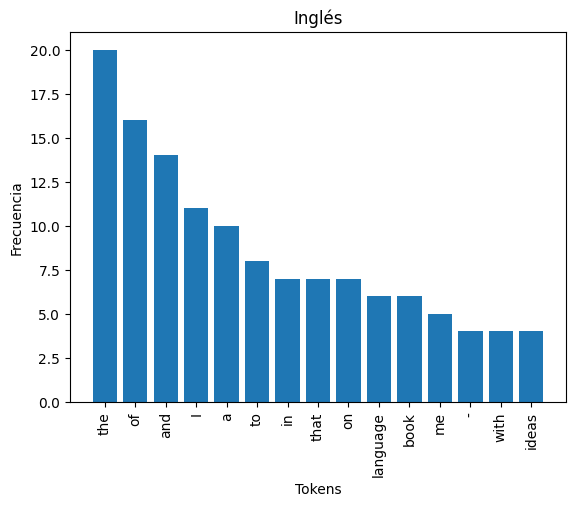

In [9]:
#hacemos el histograma de frecuencias
frecuencia = {}
for token in documento_Ing:
    if token.text in frecuencia:
        frecuencia[token.text] += 1
    else:
        frecuencia[token.text] = 1

#Quitamos los signos de puntuacion
frecuencia.pop("\n")
frecuencia.pop(".")
frecuencia.pop(",")
frecuencia.pop(":")
frecuencia.pop("(")
frecuencia.pop(")")

#Hacemos el histograma de frecuencias
fig, ax = plt.subplots()
frecuencia = dict(sorted(frecuencia.items(), key=lambda item: item[1], reverse=True)[:15])
ax.bar(frecuencia.keys(), frecuencia.values())
plt.xticks(rotation=90)
ax.set_xlabel('Tokens')
ax.set_ylabel('Frecuencia')
ax.set_title('Inglés')



Texto sin stopwords:
['journey', 'toward', 'language', 'sparked', '1996', 'discovered', 'keith', 'basso', '’s', 'astonishing', 'book', 'wisdom', 'sits', 'places', 'writing', 'unique', 'place', 'making', 'language', 'western', 'apache', 'basso', 'described', 'language', 'way', '’d', 'never', 'considered', 'roots', 'fragments', 'strung', 'together', 'sing', 'land', 'idea', 'intrigued', 'much', 'began', 'carrying', 'donald', 'borror', '’s', 'classic', 'little', 'book', 'dictionary', 'word', 'roots', 'combining', 'forms', 'hikes', 'practice', '’ve', 'continued', 'daily', 'basis', 'nearly', 'twenty', 'years', 'thousands', 'miles', 'trails', 'order', 'learn', 'meaning', 'origin', 'word', 'elements', 'moment', 'occurred', 'walking', 'wild', 'landscapes', 'many', 'years', 'seemed', 'little', 'quirky', 'hobby', 'real', 'intent', 'direction', 'friend', 'introduced', 'calvert', 'watkins', '’s', 'magisterial', 'survey', 'indo', 'european', 'poetics', 'kill', 'dragon', 'flash', 'realized', 'might

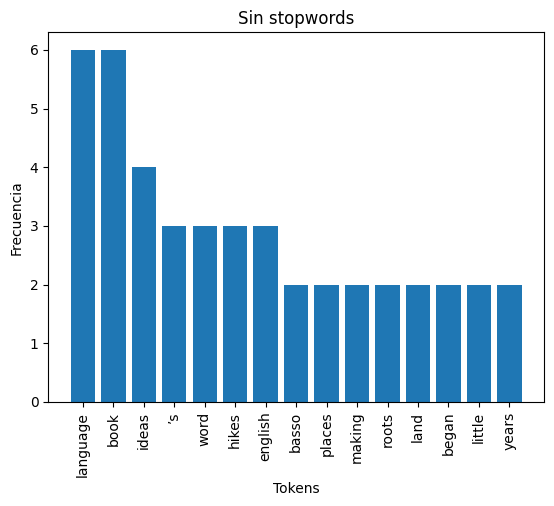



Texto lematizado:
['journey', 'toward', 'language', 'spark', '1996', 'discover', 'keith', 'basso', '’s', 'astonishing', 'book', 'wisdom', 'sit', 'places', 'write', 'unique', 'place', 'make', 'language', 'western', 'apache', 'basso', 'describe', 'language', 'way', '’d', 'never', 'consider', 'root', 'fragment', 'string', 'together', 'sing', 'land', 'idea', 'intrigue', 'much', 'begin', 'carry', 'donald', 'borror', '’s', 'classic', 'little', 'book', 'dictionary', 'word', 'roots', 'combining', 'forms', 'hike', 'practice', '’ve', 'continue', 'daily', 'basis', 'nearly', 'twenty', 'year', 'thousand', 'mile', 'trail', 'order', 'learn', 'meaning', 'origin', 'word', 'element', 'moment', 'occur', 'walk', 'wild', 'landscape', 'many', 'year', 'seem', 'little', 'quirky', 'hobby', 'real', 'intent', 'direction', 'friend', 'introduce', 'calvert', 'watkins', '’s', 'magisterial', 'survey', 'indo', 'european', 'poetic', 'kill', 'dragon', 'flash', 'realize', 'might', 'untapped', 'way', 'english', 'languag

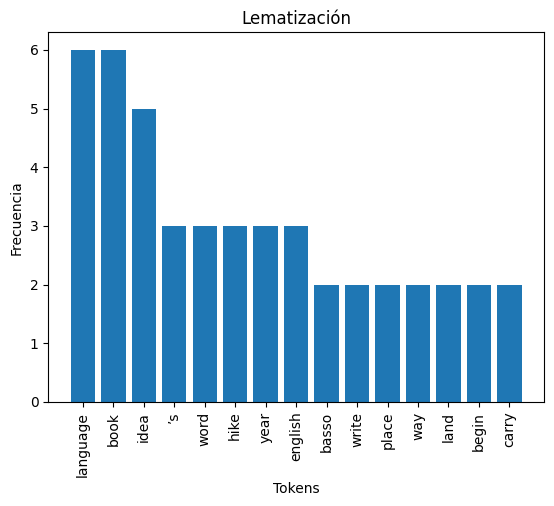



Texto stem:
['journey', 'toward', 'languag', 'spark', '1996', 'discov', 'keith', 'basso', '’s', 'astonish', 'book', 'wisdom', 'sit', 'place', 'write', 'uniqu', 'place', 'make', 'languag', 'western', 'apach', 'basso', 'describ', 'languag', 'way', '’d', 'never', 'consid', 'befor', 'root', 'fragment', 'strung', 'togeth', 'sing', 'land', 'idea', 'intrigu', 'much', 'began', 'carri', 'donald', 'borror', '’s', 'classic', 'littl', 'book', 'dictionari', 'word', 'root', 'combin', 'form', 'hike', 'practic', 'continu', 'daili', 'basi', 'near', 'twenti', 'year', 'thousand', 'mile', 'trail', 'order', 'learn', 'mean', 'origin', 'word', 'element', 'moment', 'occur', 'walk', 'wild', 'landscap', 'mani', 'year', 'seem', 'littl', 'quirki', 'hobbi', 'real', 'intent', 'direct', 'friend', 'introduc', 'calvert', 'watkin', '’s', 'magisteri', 'survey', 'indo', 'european', 'poetic', 'kill', 'dragon', 'flash', 'realiz', 'might', 'untap', 'way', 'english', 'languag', 'speak', 'magic', 'land', 'depth', 'human', '

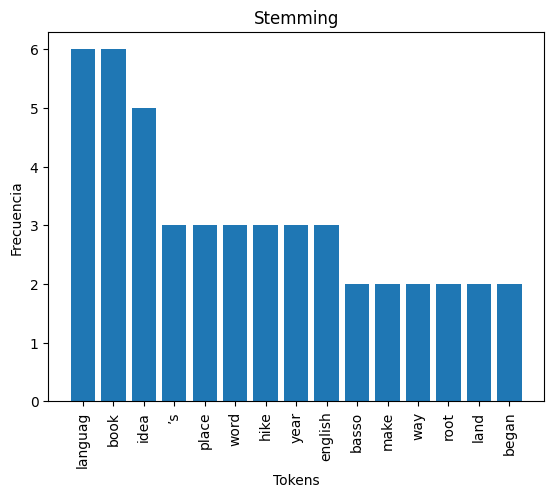

Texto con todas las normalizaciones:
journey toward languag spark 1996 discov keith basso ’s astonish book wisdom sit place write uniqu place make languag western apach basso describ languag way would never consid root fragment string togeth sing land idea intrigu much begin carri donald borror ’s classic littl book dictionari word root combin form hike practic ve continu daili basi near twenti year thousand mile trail order learn mean origin word element moment occur walk wild landscap mani year seem littl quirki hobbi real intent direct friend introduc calvert watkin ’s magisteri survey indo european poetic kill dragon flash realiz might untap way english languag speak magic land depth human spirit begin four year quest read everi book could find histori format word make process english languag hold result investig 76 section explor mani piec process go shape english languag use today research write section book carri idea long hike wild place hold natur world see idea reson idea tak

In [10]:
#Llamamos a una variables STOPWORD que contiene las palabras que no aportan significado, debido a que Spacy no tiene stopwords en inglés
STOP_WORDS = nltk.corpus.stopwords.words('english')

# Hacemos la remoción de stopwords y signos de puntuación
texto = [token.text.lower() for token in documento_Ing if not token.is_punct and not token.is_space and token.text.lower() not in STOP_WORDS]

# Imprimimos el texto sin stopwords
print("\n\nTexto sin stopwords:")
print(texto)

# Contamos la frecuencia de las palabras sin stopwords
frequency = {}
for token in texto:
    if token in frequency:
        frequency[token] += 1
    else:
        frequency[token] = 1

print("\n\nNúmero de tokens sin stopwords:", len(texto))

# Ordenamos el diccionario de frecuencias y seleccionamos los 15 tokens más frecuentes
frequency = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True)[:15])
fig, ax = plt.subplots()
ax.bar(frequency.keys(), frequency.values())
plt.xticks(rotation=90)
ax.set_xlabel('Tokens')
ax.set_ylabel('Frecuencia')
ax.set_title('Sin stopwords')
plt.show()

# Procesamos el texto lematizado
texto_lematizado = [token.lemma_.lower() for token in documento_Ing if not token.is_punct and not token.is_space and token.lemma_.lower() not in STOP_WORDS]

# Imprimimos el texto lematizado
print("\n\nTexto lematizado:")
print(texto_lematizado)

# Contamos la frecuencia de las palabras lematizadas
frequency = {}
for token in texto_lematizado:
    if token in frequency:
        frequency[token] += 1
    else:
        frequency[token] = 1

print("\n\nNúmero de tokens lematizados:", len(texto_lematizado))

# Ordenamos el diccionario de frecuencias y seleccionamos los 15 tokens más frecuentes
frequency = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True)[:15])

# Creamos el gráfico de barras para la frecuencia de palabras
fig, ax = plt.subplots()
ax.bar(frequency.keys(), frequency.values())
plt.xticks(rotation=90)
ax.set_xlabel('Tokens')
ax.set_ylabel('Frecuencia')
ax.set_title('Lematización')
plt.show()

# Inicializamos el stemmer
stemmer = nltk.stem.SnowballStemmer('english')
# Aplicamos el stemmer
texto_stem = [stemmer.stem(token.text.lower()) for token in documento_Ing if not token.is_punct and not token.is_space and stemmer.stem(token.text.lower()) not in STOP_WORDS]

# Imprimimos el texto stem
print("\n\nTexto stem:")
print(texto_stem)

# Contamos la frecuencia de las palabras stem
frequency = {}
for token in texto_stem:
    if token in frequency:
        frequency[token] += 1
    else:
        frequency[token] = 1

print("\n\nNúmero de tokens stem:", len(texto_stem))

# Ordenamos el diccionario de frecuencias y seleccionamos los 15 tokens más frecuentes
frequency = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True)[:15])

# Creamos el gráfico de barras para la frecuencia de palabras
fig, ax = plt.subplots()
ax.bar(frequency.keys(), frequency.values())
plt.xticks(rotation=90)
ax.set_xlabel('Tokens')
ax.set_ylabel('Frecuencia')
ax.set_title('Stemming')
plt.show()

#Hacemos expansión de contracciones
texto_Ing = texto_Ing.replace("I've", "I have")
texto_Ing = texto_Ing.replace("I'd", "I would")
texto_Ing = texto_Ing.replace("I'm", "I am")
texto_Ing = texto_Ing.replace("I'll", "I will")
texto_Ing = texto_Ing.replace("I'd", "I would")
texto_Ing = texto_Ing.replace("you've", "you have")
texto_Ing = texto_Ing.replace("I’d", "I would")

#Aplicamos todas las normalizaciónes al texto
texto_Ing = nlp(texto_Ing)
texto_Ing = [token.lemma_.lower() for token in texto_Ing if not token.is_punct and not token.is_space and token.lemma_.lower() not in STOP_WORDS]
texto_Ing = [stemmer.stem(token) for token in texto_Ing]
texto_Ing = " ".join(texto_Ing)


print("Texto con todas las normalizaciones:")
print(texto_Ing)



